In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

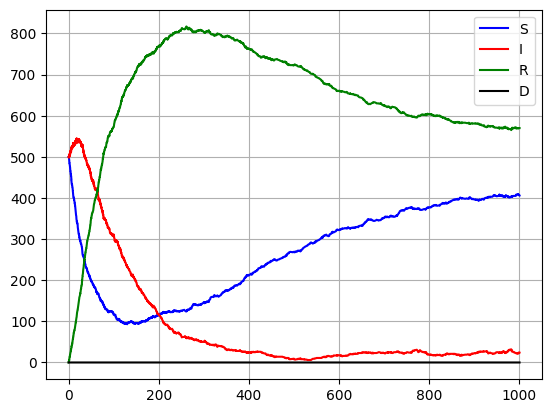

In [42]:
N = 1000
S = 500
I = 500
R = 0
D = 0
time = 0

# CYCLIC BEHAVIOR?
"""beta = 0.04 # governs rate from S to I
gamma = 0.015 # governs rate from I to R
delta = 0.001 # governs rate from R to S
mu = 0.00001 # governs rate from I to D
"""

beta = 0.04
gamma = 0.014
delta = 0.001
mu = 0.00001

birth_rate = 0.001
death_rate = 0.00001

S_list = [S]
I_list = [I]
R_list = [R]
D_list = [D]
t_list = [time]

while time < 1000:
    rateSI = beta*S*I/N
    rateIR = gamma*I
    rateRS = delta*R
    rateID = mu*I

    #S += birth_rate*S
    #S -= death_rate

    totRate = rateSI + rateIR + rateRS + rateID
    if(totRate == 0):
        break

    t = stats.expon.rvs(scale = 1/totRate)
    time += t
    probs = np.array([rateSI, rateIR, rateRS, rateID])/totRate
    event = np.random.choice(4, 1, p = probs)

    if event == 0:
        S = S - 1
        I = I + 1
    elif event == 1:
        I = I - 1
        R = R + 1
    elif event == 2:
        R = R - 1
        S = S + 1
    else:
        I = I - 1
        D = D + 1

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    D_list.append(D)
    t_list.append(time)

plt.figure()
plt.plot(t_list, S_list, color = 'blue', label = 'S')
plt.plot(t_list, I_list, color = 'red', label = 'I')
plt.plot(t_list, R_list, color = 'green', label = 'R')
plt.plot(t_list, D_list, color = 'black', label = 'D')
plt.grid()
plt.legend()
plt.show()
